# Regresión lineal: Hiper-parámetros del entrenamiento
M2U2 - Ejercicio 6

## ¿Qué vamos a hacer?
- Comprobar el efecto de los diferentes hiper-parámetros en el entrenamiento de un modelo

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Efecto de los hiper-parámetros

En este laboratorio no vamos a introducir ningún concepto nuevo, ni a implementar ningún código que no hayamos implementado en otros ejercicios previos.

El objetivo de este ejercicio es tener la oportunidad de comprobar cómo afectan los diferentes hiper-parámetros y otras configuraciones a nuestro proceso de entrenamiento.

Para ello, simplemente vas a copiar tus celdas de código del ejercicio anterior ([Regresión lineal: Ejemplo sobre dataset sintético](https://github.com/Tokio-School/Machine-Learning/blob/main/M02-Aprendizaje_supervisado/M2U2-Optimizaci%C3%B3n_por_descenso_de_gradiente/M2U2-5-Dataset_sint%C3%A9tico.ipynb), vas a modificar muchas veces los hiper-parámetros utilizados y vas a comprobar su efecto sobre el entrenamiento, además de validar tu implementación de nuevo, que usarás en múltiples ejercicios posteriores.

Por cierto, *¿conoces ya las hotkeys de JupyterLab? Te serán muy útiles durante el curso:* https://jupyterlab.readthedocs.io/en/stable/user/interface.html#keyboard-shortcuts

In [85]:
import time
import numpy as np
from matplotlib import pyplot as plt

## Creación del dataset sintético

Copia la celda del ejercicio anterior para crear un dataset sintético, con término de bias y término de error. Dale un valor al término de error distinto a 0.

In [86]:
# Número de muestras y características
m = 100
n = 20

# Crea una matriz de nºs aleatorios en el intervalo [-1, 1)
X = np.random.uniform(-1, 1, size=(m, n))

# Inserta un vector de 1s como primera columna (término bias/intercepto)
X = np.insert(X, 0, values=np.ones(m), axis=1)

# Genera un vector de nºs aleatorios en el intervalo [0, 1) de tamaño n + 1 (por el bias)
Theta_verd = np.random.rand(n + 1)

# Inicializa el error
error = 0.2

# Calcula Y como combinación lineal más error porcentual
Y = np.matmul(X, Theta_verd)

# Aplicamos el error: cada valor de Y se multiplica por (1 + termino_error)
Y_final = Y * (1 + error)

# Comprueba los valores y dimensiones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)

print('\nPrimeras 10 filas de X:')
print(X[:10, :])

print('\nPrimeros 10 valores de Y:')
print(Y[:10])

print('\nDimensiones de X e Y:')
print(X.shape, Y.shape)


Theta a estimar y sus dimensiones:
[0.4096711  0.34630091 0.65630035 0.1167672  0.6828302  0.37425015
 0.60335954 0.22119569 0.16633157 0.24057276 0.19783272 0.15203353
 0.82783564 0.35277228 0.94965851 0.61089371 0.8816072  0.20458103
 0.13061606 0.29576193 0.12317917]
(21,)

Primeras 10 filas de X:
[[ 1.          0.34303744  0.29566545  0.2493788  -0.93082992  0.58936868
  -0.766484    0.1666915  -0.07881699  0.48844175 -0.54650284 -0.80399605
   0.50632861 -0.12339122 -0.20190371  0.95563624  0.10185351 -0.963923
   0.80631399  0.5099337   0.0195661 ]
 [ 1.         -0.44169783  0.77942772 -0.64815457 -0.64100448 -0.32679639
  -0.21530364 -0.42154729  0.41092398 -0.07779012 -0.09083036 -0.9426145
   0.75788773  0.48234013  0.6057559  -0.95590717  0.74049978  0.36808321
   0.77079771  0.94517649 -0.27186342]
 [ 1.          0.84131656 -0.83496012  0.23071124  0.7140564   0.70585236
   0.51354065 -0.64592515  0.37901303 -0.40047659  0.47365677 -0.13547299
  -0.88711871 -0.9405511  -0.67

## Entrenamiento del modelo

Copia la celda con las funciones de coste y el gradient descent y la celda que entrena el modelo por gradient descent.

In [87]:
# TODO: Copia el código de tus funciones de coste y descenso de gradiente

def cost_function(x, y, theta):
    """Computa la función de coste de manera vectorizada.

    Argumentos:
    x -- array 2D de Numpy, tamaño m x n
    y -- array 1D de Numpy, tamaño m
    theta -- array 1D de Numpy, tamaño n

    Devuelve:
    j -- float con el coste para theta
    """
    # número de ejemplos
    m = x.shape[0]

    # asegurar que theta sea un vector columna (n x 1) para multiplicación matricial
    theta = theta.reshape(-1, 1)  # ahora es n x 1

    # predecir todas las Y usando multiplicación matricial
    h = np.matmul(x, theta)

    # convertir y en vector columna si es necesario
    y = y.reshape(-1, 1)  # m x 1

    # calcular residuos (diferencia entre predicción y valores reales)
    residuos = h - y  # m x 1

    # elevar al cuadrado y sumar todos los residuos
    suma_cuadrados = np.sum(residuos**2)

    # coste final según la fórmula J(theta) = 1/(2*m) * sum((h-y)^2)
    j = suma_cuadrados / (2*m)

    # asegurar que devuelva float y no array 2D
    return float(j)


def gradient_descent(x, y, theta, alpha, e=1e-6, iter_=1000):
    """ Entrena el modelo optimizando su función de coste por gradient descent

    Argumentos posicionales:
    x -- array 2D de Numpy con los valores de las variables independientes de los ejemplos, de tamaño m x n
    y -- array 1D de Numpy con la variable dependiente/objetivo, de tamaño m x 1
    theta -- array 1D de Numpy con los pesos de los coeficientes del modelo, de tamaño 1 x n (vector fila)
    alpha -- float, ratio de entrenamiento

    Argumentos nombrados (keyword):
    e -- float, diferencia mínima entre iteraciones para declarar que el entrenamiento ha convergido finalmente
    iter_ -- int/float, nº de iteraciones

    Devuelve:
    j_hist -- list/array con la evolución de la función de coste durante el entrenamiento
    theta -- array de Numpy con el valor de theta en la última iteración
    """

    iter_ = int(iter_)    # Si has declarado iter_ en notación científica (1e3) o float (1000.), conviértelo

    # Inicializa j_hist como una list o un array de Numpy. Recuerda que no sabemos qué tamaño tendrá finalmente
    # Su nº máx. de elementos será el nº máx. de iteraciones
    j_hist = []

    m, n = x.shape    # Obtén m y n a partir de las dimensiones de X

    for k in range(iter_):    # Itera sobre el nº de iteraciones máximo
        theta_iter = theta.copy()    # Copia con "deep copy" la theta para cada iteración, ya que debemos actualizarla

        for j in range(n):    # Itera sobre el nº de características
            # Actualiza theta_iter para cada característica, según la derivada de la función de coste
            # Incluye el ratio de entrenamiento alpha
            # Cuidado con las multiplicaciones matriciales, su órden y dimensiones
            h = np.matmul(x, theta)
            grad = (1/m) * np.sum((h - y) * x[:, j])
            theta_iter[j] = theta[j] - alpha * grad

        theta = theta_iter    # Actualiza toda la theta, lista para la siguiente iteración

        cost = cost_function(x, y, theta)    # Calcula el coste para la iteración de theta actual

        j_hist.append(cost)    # Añade el coste de la iteración actual al histórico de costes

        # Comprueba si la diferencia entre el coste de la iteración actual y el de la última iteración en valor
        # absoluto son menores que la diferencia mínima para declarar convergencia, e, para toda iteración
        # excepto la primera
        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print('Converge en la iteración nº: ', k)
            break
    else:
        print('Nº máx. de iteraciones alcanzado')

    return j_hist, theta


# TODO: Entrena tu modelo de ML optimizando sus coeficientes Theta por gradient descent

# Inicializa theta con n + 1 valores aleatorios
theta_ini = np.random.random(n + 1)

print('Theta inicial:')
print(theta_ini)

alpha = 0.2
e = 1e-4
iter_ = 1e5

print('Hiper-parámetros a utilizar:')
print('Alpha: {}, e: {}, nº máx. iter: {}'.format(alpha, e, iter_))

t = time.time()
j_hist, theta = gradient_descent(X, Y, theta_ini, alpha, e, iter_)
print('Tiempo de entrenamiento (s):', time.time() - t)

# TODO: completar
print('\nÚltimos 10 valores de la función de coste')
print(j_hist[-10:])
print('\nCoste final:')
print(j_hist[-1])
print('\nTheta final:')
print(theta)



Theta inicial:
[0.7043977  0.99487661 0.17780455 0.57459768 0.26565217 0.24169975
 0.12103635 0.0359842  0.93252516 0.78608826 0.58148832 0.30116551
 0.87522058 0.08611038 0.46210967 0.05522424 0.44434859 0.53588825
 0.05200426 0.11525958 0.74954713]
Hiper-parámetros a utilizar:
Alpha: 0.2, e: 0.0001, nº máx. iter: 100000.0
Converge en la iteración nº:  68
Tiempo de entrenamiento (s): 0.023653268814086914

Últimos 10 valores de la función de coste
[0.00251614645099688, 0.0023437091801296545, 0.002183867011428224, 0.0020356471558013443, 0.0018981558061330283, 0.0017705714118279236, 0.001652138554833642, 0.0015421623703847772, 0.0014400034614018397, 0.0013450732605567162]

Coste final:
0.0013450732605567162

Theta final:
[0.40084396 0.39225394 0.62579536 0.12869229 0.66429912 0.38693064
 0.61184185 0.18456122 0.21620588 0.2718482  0.23464941 0.14430366
 0.85849407 0.35865166 0.92191666 0.56692527 0.8678119  0.17669102
 0.12136003 0.3070712  0.17234807]


## Comprobar el entrenamiento del modelo

Copia la celda que representa gráficamente el histórico de la función de coste de tu modelo.

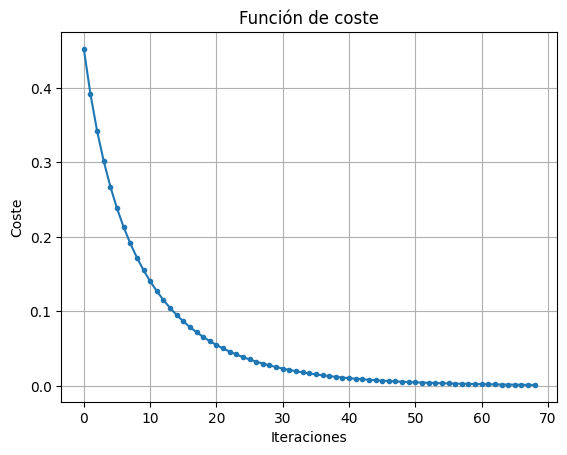

In [88]:
# TODO: Representa la evolución de la función de coste vs el nº de iteraciones

plt.title('Función de coste')
plt.xlabel('Iteraciones')
plt.ylabel('Coste')
plt.plot(range(len(j_hist)), j_hist, marker="o", markersize=3, linestyle="-")
plt.grid()
plt.show()

## Evaluación del modelo

Copia la celda que calcula y representa gráficamente los resíduos de tu modelo.

Añádele a dicha celda el cálculo de la Y predicha (*Y_pred*) de la celda anterior, ya que sin dicha variable su código no funcionará correctamente.

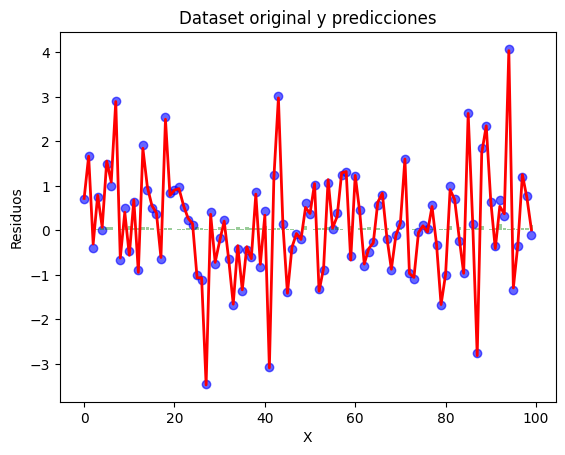

In [89]:
# TODO: Representa gráficamente los residuos entre la Y inicial y la Y predicha para los mismos ejemplos

# Realiza predicciones para cada valor de la X original con la theta entrenada por el modelo
Y_pred = X @ theta

plt.figure(2)

plt.title('Dataset original y predicciones')
plt.xlabel('X')
plt.ylabel('Residuos')

# Calcula los residuos para cada ejemplo
# Recuerda que son la diferencia en valor absoluto entre la Y real y la Y predicha para cada ejemplo
residuos = np.abs(Y - Y_pred)

# Usa una gráfica con series diferentes: Y de entrenamiento, Y predicha y residuos
# Usa una gráfica de puntos para la Y de entrenamiento, de línea para la Y predicha y de barra para los residuos, superpuestas
plt.scatter(range(len(Y)), Y, color='blue', label='Y real', alpha=0.6)

# Gráfica de línea para la Y predicha
plt.plot(range(len(Y_pred)), Y_pred, color='red', label='Y predicha', linewidth=2)

# Gráfica de barras para los residuos
plt.bar(range(len(residuos)), residuos, color='green', alpha=0.4, label='Residuos')

plt.show()

## Modifica los hiper-parámetros y comprueba su efecto.

Ahora procede a modificar uno a uno los diferentes hiper-parámetros y comprueba su efecto. Los hiper-parámetros del entrenamiento y otros parámetros de configuración que vamos a modificar son los siguientes:
1. *m* y *n*
1. Término del error del dataset, *error*
1. Ratio de entrenamiento, *alpha*
1. Parámetro de convergencia, *e*
1. Nº máximo de iteraciones, *iter_*

Queremos que en esta tarea seas lo más autónomo posible, que te tomes este tiempo para poder experimentar, descubrir por ti mismo el comportamiento de dichos parámetros, para aprender cómo modificarlos en el futuro, cuando debamos modificarlos para optimizar el entrenamiento de modelos más complejos.

Por tanto, *¿por qué no aprovechas para disfrutar y descubrir por tu cuenta qué puede suceder cuando los modificamos, tanto individualmente como en conjunto?*

Cuando estés listo para continuar, puedes pasar al último apartado

## Modificación de los hiper-parámetros: preguntas y conclusiones

Como objetivo de evaluación del ejercicio, vamos a incluir algunas preguntas simples para que las puedas responder en función de tus apreciaciones en el punto anterior. Puedes modificar esta celda de markdown y añadir tus respuestas a las mismas.

*¿Qué sucede cuando aumentamos el nº de ejemplos?*
El modelo, al tener más datos, generaliza más.



*¿Cómo afecta al tiempo de entrenamiento?*
Aumenta.

*¿Cómo afecta a la precisión o coste final del modelo?*
Es más preciso.

*¿Qué sucede cuando aumentamos el nº de características? ¿Cómo afecta al tiempo de entrenamiento y a la precisión del modelo?*
Aumenta el tiempo de entrenamiento, también aumenta la precisión.



*¿Cómo afecta el término del error a tu entrenamiento? A su precisión, al nº de iteraciones hasta que converge...*
La precisión es peor y aumenta el número de iteraciones.



*¿Cómo afecta el nº máximo de iteraciones al entrenamiento? ¿Tiene algo que ver con el tiempo de entrenamiento, la precisión final, etc.?*
Si es bajo, puede no converger, si es alto, se puede desperdiciar tiempo, por lo tanto, si es bajo, puede disminuir la precisión.

*¿Hay un límite del nº máximo de iteraciones? ¿Podemos aumentar este nº hasta el infinito para conseguir p. ej. mejorar la precisión?*
No, pero no tienen ninguna utilidad, ya que cuando converja, no se va a aumentar el coste ni la precisión de manera significativa.

*¿Están relacionados el nº máximo de iteraciones y el parámetro de convergencia del entrenamiento?*

Sí, el número maximo es el límite superior, el parámetro de convergencia, decide cuando se paran las iteraciones al no haber una diferencia ya significativa.


*¿Está relacionado el parámetro de convergencia y el coste final del modelo?*
Sí, con un e pequeño hará que se acerca al mínimo de coste, aunque se puede demorar más, en cambio, si es  grande, no se acercará y el coste será mayor.


*¿Cómo afecta el ratio de entrenamiento al modelo? ¿Afecta a su velocidad, a su precisión?*
Si Alpha es grande, puede divergir y afectar a su precisión y, si es pequeño, irá lento, hay que encontrar un equilibrio.



*¿Podemos elevar el ratio de entrenamiento hasta el infinito? ¿Hay algún límite a partir del cual deje de funcionar, tanto en valor máximo como mínimo?*
Sí, alpha es demasiado grande, el modelo diverge y nunca converge. Si los valores son cercanos a 0 es posible que sea muy lento


